# Задание 
Необходимо загрузить данные опросов с сайта stackoverflow за 2020 или 2019 год (https://insights.stackoverflow.com/survey) и провести исследование данных по аналогии с работой на занятии.

In [ ]:
!wget https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip
!unzip stack-overflow-developer-survey-2021.zip

--2022-08-06 09:55:12--  https://info.stackoverflowsolutions.com/rs/719-EMH-566/images/stack-overflow-developer-survey-2021.zip
Resolving info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)... 104.17.73.206, 104.17.71.206, 104.17.70.206, ...
Connecting to info.stackoverflowsolutions.com (info.stackoverflowsolutions.com)|104.17.73.206|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8825103 (8.4M) [application/zip]
Saving to: ‘stack-overflow-developer-survey-2021.zip’

stack-overflow-deve 100%[===================>]   8.42M  36.3MB/s    in 0.2s    

2022-08-06 09:55:13 (36.3 MB/s) - ‘stack-overflow-developer-survey-2021.zip’ saved [8825103/8825103]

Archive:  stack-overflow-developer-survey-2021.zip
  inflating: README_2021.txt         
  inflating: so_survey_2021.pdf      
  inflating: survey_results_public.csv  
  inflating: survey_results_schema.csv  


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import seaborn as sns

In [ ]:
survay_raw_df = pd.read_csv('survey_results_public.csv')
survay_raw_df.shape

(83439, 48)

In [ ]:
survay_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [ ]:
schema = pd.read_csv('survey_results_schema.csv')
schema

,qid,qname,question,force_resp,type,selector
0,QID16,S0,"<div><span style=""font-size:19px;""><strong>Hel...",False,DB,TB
1,QID12,MetaInfo,Browser Meta Info,False,Meta,Browser
2,QID1,S1,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
3,QID2,MainBranch,Which of the following options best describes ...,True,MC,SAVR
4,QID24,Employment,Which of the following best describes your cur...,False,MC,MAVR
5,QID6,Country,"Where do you live? <span style=""font-weight: b...",True,MC,DL
6,QID7,US_State,<p>In which state or territory of the USA do y...,False,MC,DL
7,QID9,UK_Country,In which part of the United Kingdom do you liv...,False,MC,DL
8,QID190,S2,"<span style=""font-size:22px; font-family: aria...",False,DB,TB
9,QID25,EdLevel,Which of the following best describes the high...,False,MC,SAVR


In [ ]:
schema[schema['qname'] == 'NEWStuck'].question.values

array(['What do you do when you get stuck on a problem? Select all that apply.'],
      dtype=object)

## Демография и распределение по странам
## Уровень программирования, языки и предпочтения
## Инсайды по профессии

In [ ]:
survay_raw_df.columns
cols = [
        #Demographics
        'Country',
        'Age',
        'Gender',
        'EdLevel',
        'LearnCode',
        #Programming skills
        #'Hobbyist',
        'Age1stCode',
        'YearsCode',
        'YearsCodePro',
        'LanguageHaveWorkedWith',
        'LanguageWantToWorkWith',
        #'NEWLearn',
        'NEWStuck',
        #Employment data
        'Employment',
        'DevType',
        #'WorkWeekHrs',
        'MentalHealth',
        'Currency', 'CompTotal',
       'CompFreq'
        #'JobFactors',
       #'JobSat',
       # 'NEWOvertime',
       # 'NEWEdImpt'
]

survay_raw_df = survay_raw_df[cols]

survay_raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Country                 83439 non-null  object 
 1   Age                     82407 non-null  object 
 2   Gender                  82286 non-null  object 
 3   EdLevel                 83126 non-null  object 
 4   LearnCode               82963 non-null  object 
 5   Age1stCode              83243 non-null  object 
 6   YearsCode               81641 non-null  object 
 7   YearsCodePro            61216 non-null  object 
 8   LanguageHaveWorkedWith  82357 non-null  object 
 9   LanguageWantToWorkWith  76821 non-null  object 
 10  NEWStuck                83052 non-null  object 
 11  Employment              83323 non-null  object 
 12  DevType                 66484 non-null  object 
 13  MentalHealth            76920 non-null  object 
 14  Currency                61080 non-null

In [ ]:
survay_raw_df['Age1stCode'] = pd.to_numeric(survay_raw_df['Age1stCode'],errors='coerce')
survay_raw_df['Age'] = pd.to_numeric(survay_raw_df['Age'],errors='coerce')
survay_raw_df['YearsCode'] = pd.to_numeric(survay_raw_df['YearsCode'],errors='coerce')
survay_raw_df['YearsCodePro'] = pd.to_numeric(survay_raw_df['YearsCodePro'],errors='coerce')

In [ ]:
survay_raw_df.describe()

,Age,Age1stCode,YearsCode,YearsCodePro
count,0.0,0.0,79982.000000,58467.000000
mean,NaN,NaN,12.485722,9.572511
std,NaN,NaN,9.626184,8.123225
min,NaN,NaN,1.000000,1.000000
25%,NaN,NaN,5.000000,4.000000
50%,NaN,NaN,10.000000,7.000000
75%,NaN,NaN,17.000000,13.000000
max,NaN,NaN,50.000000,50.000000


In [ ]:
survay_raw_df[['Age1stCode']].value_counts()

Age1stCode          
11 - 17 years           44170
18 - 24 years           20065
5 - 10 years            11720
25 - 34 years            4199
35 - 44 years            1312
Younger than 5 years      905
45 - 54 years             544
55 - 64 years             245
Older than 64 years        83
dtype: int64

In [ ]:
survay_raw_df[['Age']].value_counts()

Age               
25-34 years old       32568
18-24 years old       20993
35-44 years old       15183
45-54 years old        5472
Under 18 years old     5376
55-64 years old        1819
Prefer not to say       575
65 years or older       421
dtype: int64

In [ ]:
survay_raw_df.drop(survay_raw_df[survay_raw_df['Age']<10].index,inplace=True)
survay_raw_df.drop(survay_raw_df[survay_raw_df['Age']>99].index,inplace=True)

In [ ]:
survay_raw_df['Gender'].value_counts()

Man      74817
Woman     4120
Name: Gender, dtype: int64

In [ ]:
survay_raw_df.drop(survay_raw_df[~survay_raw_df['Gender'].isin(['Man','Woman'])].index,inplace=True)

In [ ]:
df_country = survay_raw_df['Country'].value_counts().reset_index()
df_country.head(10)

,index,Country
0,United States of America,14093
1,India,10008
2,Germany,5319
3,United Kingdom of Great Britain and Northern I...,4221
4,Canada,2834
5,France,2531
6,Brazil,2182
7,Poland,1735
8,Netherlands,1692
9,Italy,1621


In [ ]:
df_country = survay_raw_df['Country'].value_counts().reset_index()

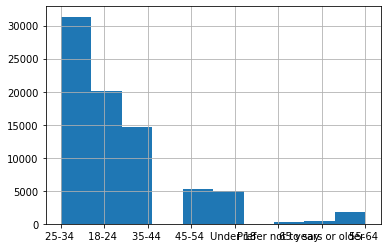

In [ ]:
survay_raw_df['Age'].str.replace("years old","").hist()

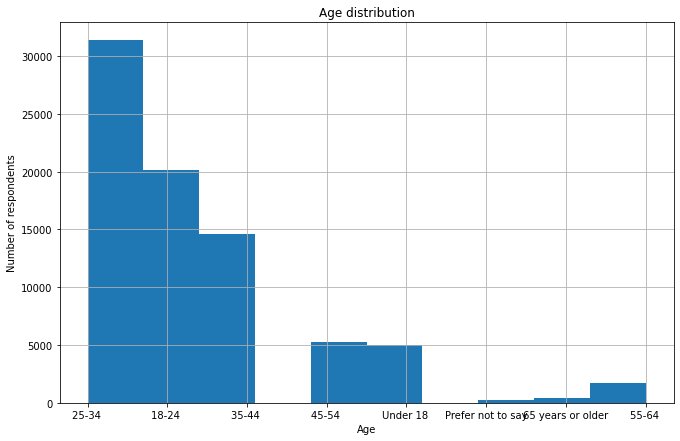

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('Number of respondents')
survay_raw_df['Age'].str.replace("years old","").hist()
#plt.hist(survay_raw_df['Age'].str.replace("years old","").value_counts(),color='Indigo')
plt.show()

TypeError: ignored

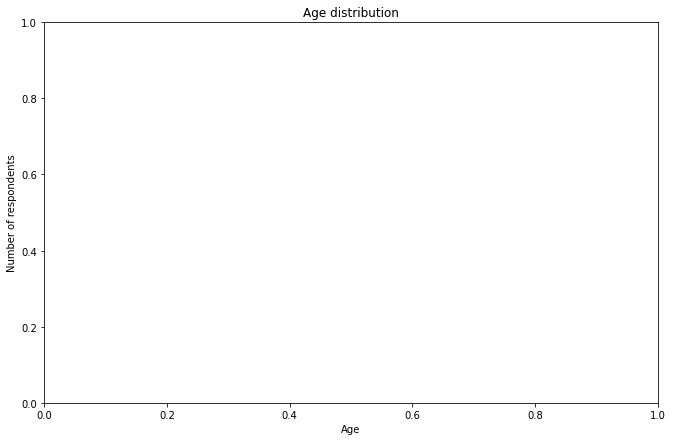

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Age distribution")
plt.xlabel('Age')
plt.ylabel('Number of respondents')
plt.hist(survay_raw_df['Age'],bins=np.arange(10,100,5),color='Indigo')
plt.show()

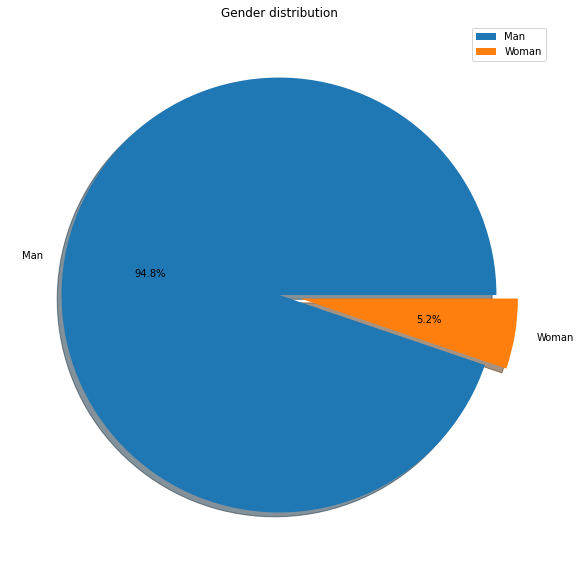

In [ ]:
fig, ax1 = plt.subplots(figsize=(12,10))
plt.title('Gender distribution')
ax1.pie(survay_raw_df['Gender'].value_counts(),labels=survay_raw_df['Gender'].value_counts().index,shadow=True,explode=(0,0.1),autopct="%1.1f%%")
ax1.legend(labels=survay_raw_df['Gender'].value_counts().index,loc='upper right')
plt.show()

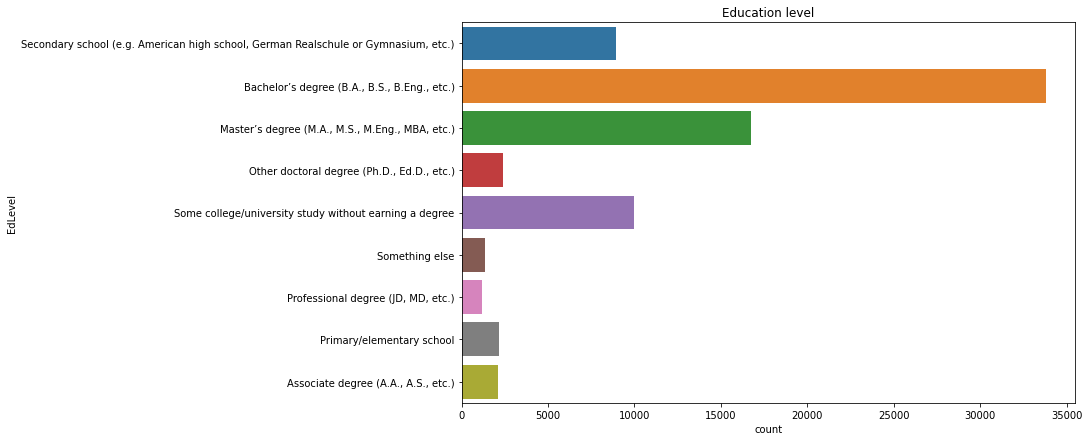

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Education level")

sns.countplot(y=survay_raw_df['EdLevel'])
plt.show()

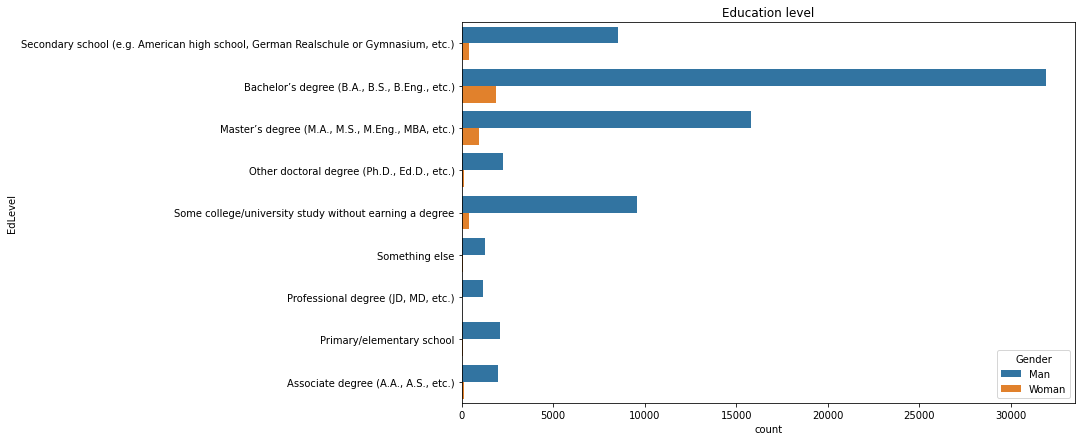

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Education level")

sns.countplot(y=survay_raw_df['EdLevel'],hue=survay_raw_df['Gender'])
plt.show()

In [ ]:
survay_raw_df['LearnCode'].value_counts()

School                                                                                                                           6913
Other online resources (ex: videos, blogs, etc)                                                                                  3274
Books / Physical media                                                                                                           3151
School;Books / Physical media                                                                                                    2984
Other online resources (ex: videos, blogs, etc);School;Books / Physical media                                                    2328
                                                                                                                                 ... 
Coding Bootcamp;Other online resources (ex: videos, blogs, etc);School;Other (please specify):;Books / Physical media               1
Online Forum;Friend or family member;Online Courses or Certifi

In [ ]:
languages_learn = survay_raw_df[survay_raw_df['LearnCode'].notnull()]

unique_languages_learn = {}


for language_learn_set in languages_learn['LearnCode'].apply(lambda row: str(row).split(';')):
    for learn in language_learn_set:
        if learn not in unique_languages_learn.keys():
            unique_languages_learn[learn] = 1
        else:
            unique_languages_learn[learn] += 1

In [ ]:
unique_languages_learn = { key:unique_languages_learn[key] / survay_raw_df['LearnCode'].count() * 100 for key in unique_languages_learn}

In [ ]:
unique_languages_learn

{'Books / Physical media': 51.60494141295913,
 'Coding Bootcamp': 10.22251625297388,
 'Colleague': 17.27840612714851,
 'Friend or family member': 18.110456609966793,
 'Online Courses or Certification': 40.73739519853437,
 'Online Forum': 31.55939491863971,
 'Other (please specify):': 8.109311586366585,
 'Other online resources (ex: videos, blogs, etc)': 59.663363061538654,
 'School': 53.83646518492131}

In [ ]:
list(unique_languages_learn.keys())

['Coding Bootcamp',
 'Other online resources (ex: videos, blogs, etc)',
 'School',
 'Online Forum',
 'Friend or family member',
 'Online Courses or Certification',
 'Other (please specify):',
 'Colleague',
 'Books / Physical media']

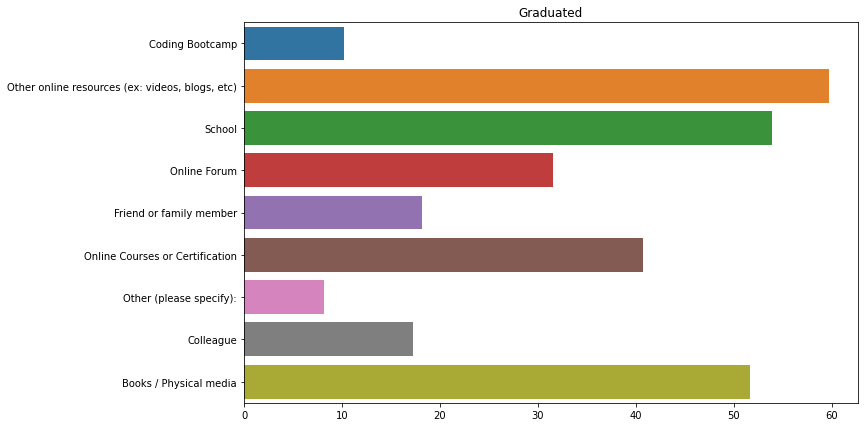

In [ ]:
#graduate_pct = survay_raw_df['LearnCode'].value_counts() / survay_raw_df['LearnCode'].count() * 100

plt.figure(figsize=(11,7))
plt.title("Graduated")

sns.barplot(y=list(unique_languages_learn.keys()),x=list(unique_languages_learn.values()))
plt.show()

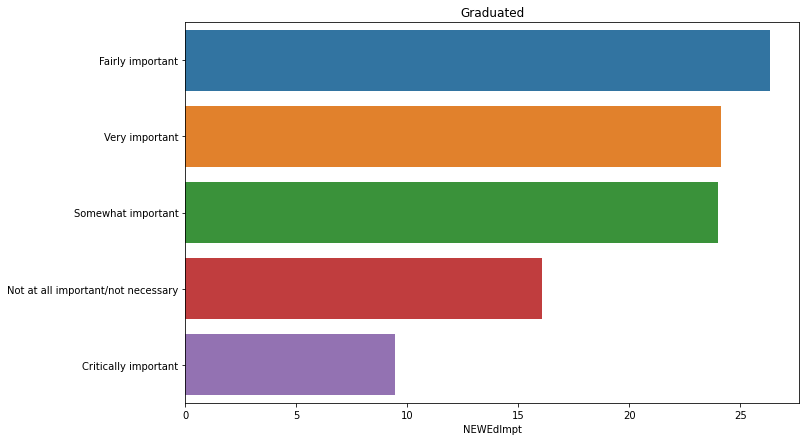

In [ ]:

graduate_pct = survay_raw_df['NEWEdImpt'].value_counts() / survay_raw_df['NEWEdImpt'].count() * 100

plt.figure(figsize=(11,7))
plt.title("Graduated")

sns.barplot(y=graduate_pct.index,x=graduate_pct)
plt.show()

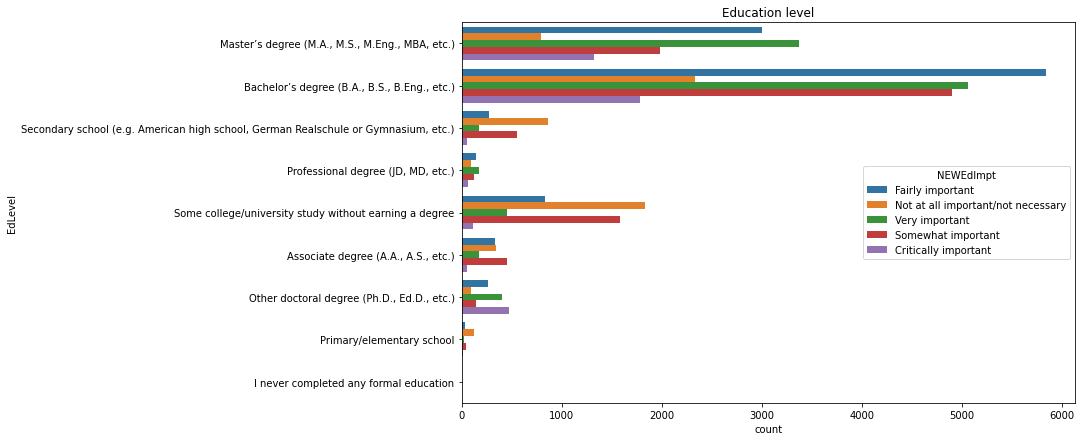

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Education level")

sns.countplot(y=survay_raw_df['EdLevel'],hue=survay_raw_df['NEWEdImpt'])
plt.show()

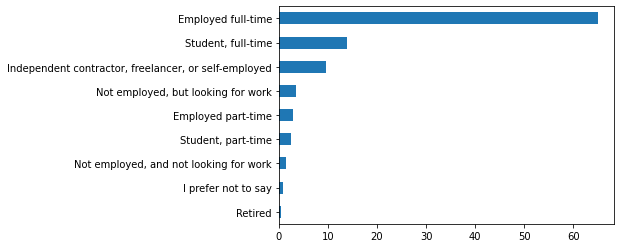

In [ ]:
(survay_raw_df['Employment'].value_counts(normalize=True,ascending=True)*100).plot(kind='barh')

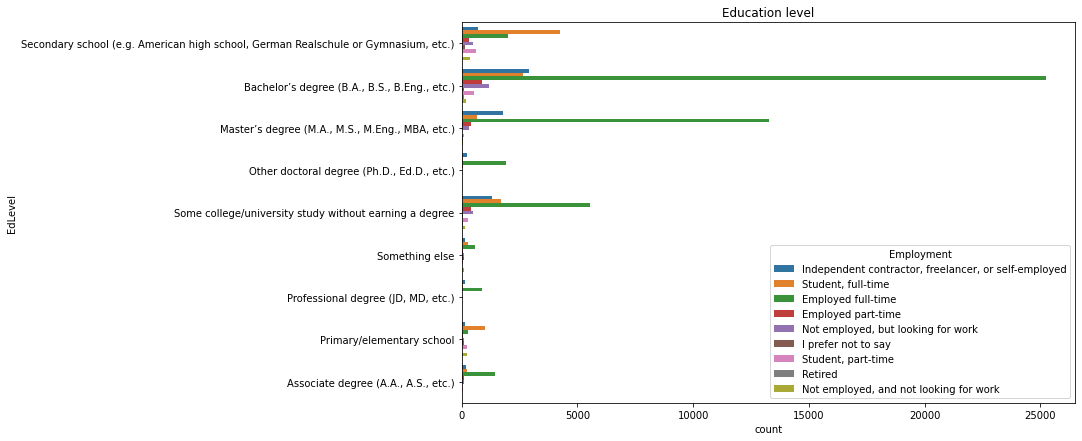

In [ ]:
plt.figure(figsize=(11,7))
plt.title("Education level")

sns.countplot(y=survay_raw_df['EdLevel'],hue=survay_raw_df['Employment'])
plt.show()

In [ ]:
# Most popular programming language in 2020

graduate_pct = survay_raw_df['LanguageHaveWorkedWith'].value_counts() / survay_raw_df['LanguageHaveWorkedWith'].count() * 100

plt.figure(figsize=(11,7))
plt.title("LanguageHaveWorkedWith")

sns.barplot(y=graduate_pct.index,x=graduate_pct)
plt.show()

KeyboardInterrupt: ignored

In [ ]:
graduate_pct = survay_raw_df['LanguageHaveWorkedWith'].value_counts() / survay_raw_df['LanguageHaveWorkedWith'].count() * 100
graduate_pct

Python                                                                                  1.598144
HTML/CSS;JavaScript;Node.js;TypeScript                                                  1.013739
Java                                                                                    0.852258
HTML/CSS;JavaScript;PHP;SQL                                                             0.827908
C#                                                                                      0.721536
                                                                                          ...   
APL;Dart;HTML/CSS;Java;JavaScript;Kotlin;Python;SQL                                     0.001282
Java;PHP;Python;R;SQL                                                                   0.001282
C;C++;HTML/CSS;Java;JavaScript;Matlab;Node.js;PHP;PowerShell;Python;R;SQL;TypeScript    0.001282
C;C#;C++;HTML/CSS;Java;JavaScript;Node.js;PHP;SQL;TypeScript;VBA                        0.001282
Delphi;Elixir;HTML/CSS;Java;Ja

In [ ]:
languages = survay_raw_df[survay_raw_df['LanguageHaveWorkedWith'].notnull()]

unique_languages = {}

# split the languages on ;
for language_set in languages['LanguageHaveWorkedWith'].apply(lambda row: str(row).split(';')):
    for language in language_set:
        if language not in unique_languages.keys():
            unique_languages[language] = 1
        else:
            unique_languages[language] += 1

In [ ]:
def plot_dimension_count(unique_dim_dict, plot_title):
    """ Function for plotting a horizontal bar graph for the given dimension dictionary
    
    INPUT - unique_dim_dict - dictionary 
            plot_title - string - plot_title
    
    OUTPUT - bar chart showing the total count for per dimension of interest
            
    """
    dim_count = pd.DataFrame.from_dict(unique_dim_dict, orient='index', dtype=None)
    dim_count.columns = ['Count']
    dim_count.sort_values('Count',ascending=True,inplace=True)

    dim_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = plot_title);

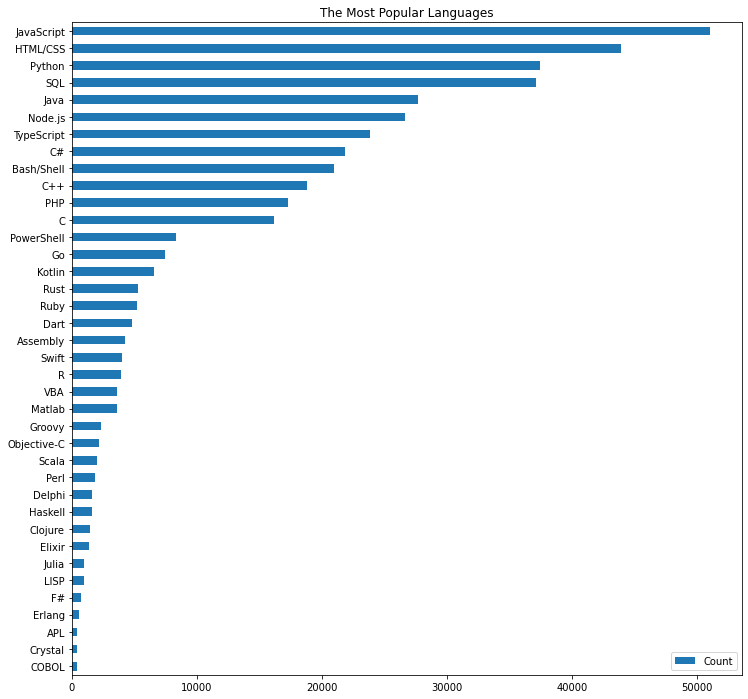

In [ ]:
plot_dimension_count(unique_languages,'The Most Popular Languages')

In [ ]:
developers = survay_raw_df[survay_raw_df['DevType'].notnull()] # drop null values

unique_developers = {}

# split the languages on ;
for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

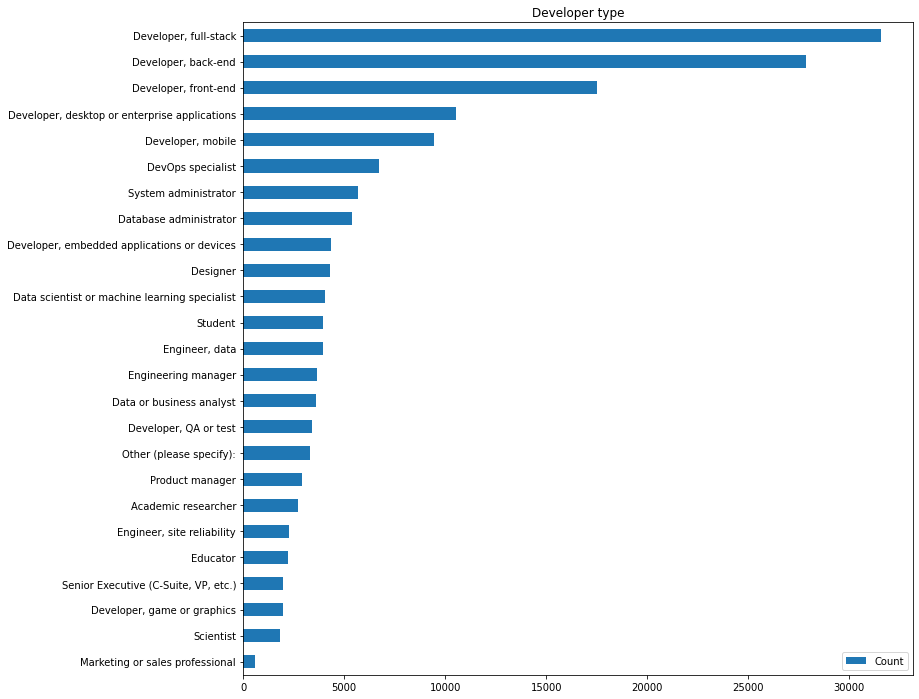

In [ ]:
plot_dimension_count(unique_developers,'Developer type')

In [ ]:
languages = languages[languages['DevType'].notnull()]
developer_count = pd.DataFrame.from_dict(unique_developers, orient='index', dtype=None)
developer_count.columns = ['Count']
developer_count.sort_values('Count',ascending=True,inplace=True)


# lets create an empty developer dict
developer_dict = {}
for devtype in developer_count.index.tolist():
    developer_dict['{}'.format(devtype)] = {}

# populate the dictionary with languages
for dev in developer_dict.keys():
    developer_dict[dev] = {key: 0 for key in list(unique_languages.keys())}
    
# now lets count the number of developers using the language
for key, val in enumerate(languages['DevType']):
    all_developers = val.split(';')
    all_languages = languages.iloc[key]['LanguageHaveWorkedWith'].split(';')
    for dev in all_developers:
        for lang in all_languages:
            try:
              developer_dict[dev][lang] += 1
            except:
              pass


developer_language_count = pd.DataFrame.from_dict(developer_dict, orient='index', dtype=None).T

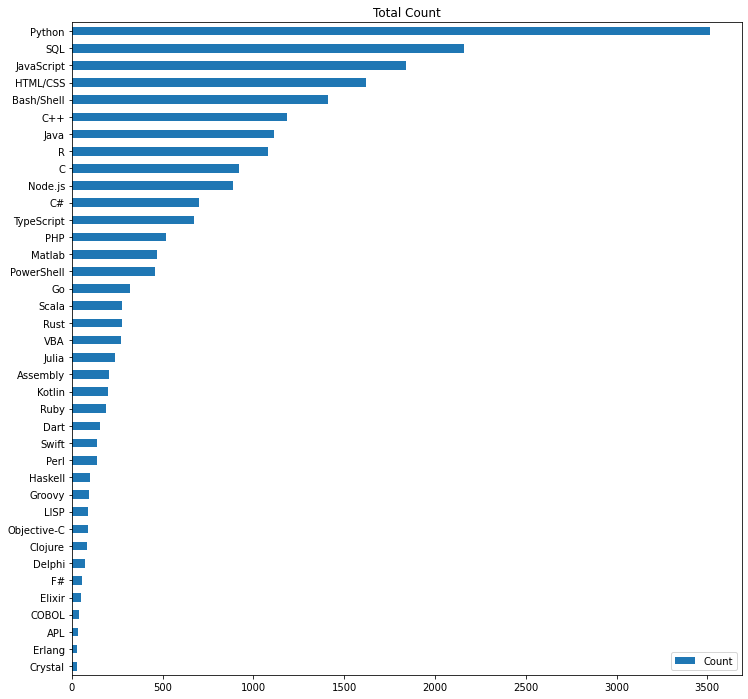

In [ ]:
ds_count = pd.DataFrame(developer_language_count['Data scientist or machine learning specialist'])
ds_count.columns = ['Count']
ds_count.sort_values('Count',ascending=True,inplace=True)

ds_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Total Count');

In [ ]:
salaries_df = survay_raw_df[['DevType', 'Country','CompTotal','CompFreq','Currency']]


In [ ]:
round((salaries_df.isnull().sum()/salaries_df.shape[0])*100,1)

DevType      20.3
Country       0.0
CompTotal    43.5
dtype: float64

In [ ]:
clean_salaries_df = salaries_df.dropna().reset_index()
clean_salaries_df.head()

,index,DevType,Country,CompTotal,CompFreq,Currency
0,0,"Developer, mobile",Slovakia,4800.0,Monthly,EUR European Euro
1,9,Data scientist or machine learning specialist,Sweden,42000.0,Monthly,SEK\tSwedish krona
2,11,"Developer, back-end",Spain,43000.0,Yearly,EUR European Euro
3,12,"Developer, desktop or enterprise applications;...",Germany,71500.0,Yearly,EUR European Euro
4,16,"Developer, full-stack",Turkey,9000.0,Monthly,TRY\tTurkish lira


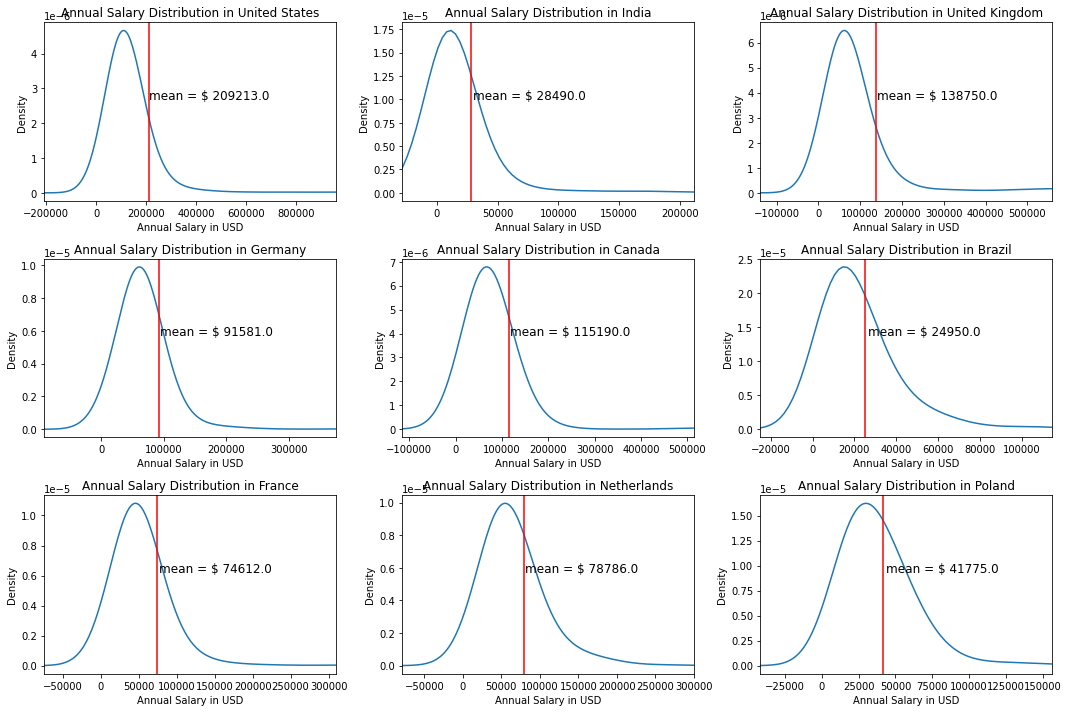

In [ ]:
fig = plt.figure(figsize=(15,10))

countries = clean_salaries_df['Country'].value_counts().sort_values(ascending=False)[:9].index.tolist()

for i,country in enumerate(countries):
    plt.subplot(3,3,i+1)
    temp_salaries = clean_salaries_df.loc[clean_salaries_df['Country']==country,'ConvertedComp']

    ax = temp_salaries.plot(kind='kde')
    ax.axvline(temp_salaries.mean(), linestyle = '-', color = 'red')
    ax.text((temp_salaries.mean() + 1500), (float(ax.get_ylim()[1])*0.55), 'mean = $ ' + str(round(temp_salaries.mean(),0)), fontsize = 12)
    ax.set_xlabel('Annual Salary in USD')
    ax.set_xlim(-temp_salaries.mean(),temp_salaries.mean()+2*temp_salaries.std())
    
    ax.set_title('Annual Salary Distribution in {}'.format(country))

plt.tight_layout()
plt.savefig('developer_salaries_by_country.png',bbox_inches = 'tight')
plt.show()

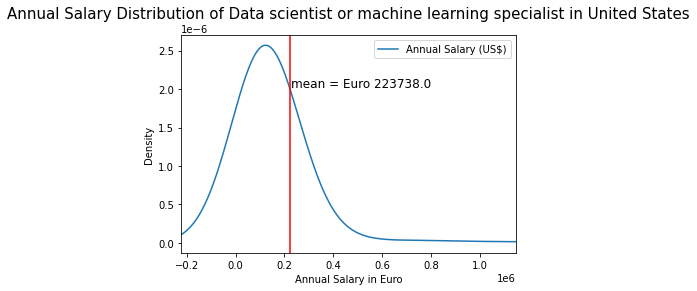

In [ ]:
# get the developer type salaries
developer_salary_df = survay_raw_df[['DevType','Country','ConvertedComp']]
# drop all rows with NaNs
clean_developer_salary_df = developer_salary_df.dropna()


# get a list of countries
developer_countries = list(clean_salaries_df['Country'].value_counts().index)

# create a dictionary with country name as key and initialised with 0 for each corresponding country key value
developer_salary_dict = {key: 0 for key in developer_countries}

# now for each country in dict, we want to put developer type and initialise to an empty list
for developer in developer_salary_dict.keys():
    developer_salary_dict[developer] = {key: [] for key in developer_count.index.tolist()}

# lets now populate developer salary dict with salaries per developer type per country
for key, val in enumerate(clean_developer_salary_df['DevType']):
    all_developers = val.split(';')
    country = clean_developer_salary_df.iloc[key, 1]
    salary = clean_developer_salary_df.iloc[key, 2]
    
    for developer in all_developers:
        developer_salary_dict[country][developer].append(salary)



dev_type = 'Data scientist or machine learning specialist'

figsize = (15,10)
df1 = pd.DataFrame({'Annual Salary (US$)':developer_salary_dict['United States'][dev_type]})
ax = df1.plot(kind = 'kde')
mean = df1['Annual Salary (US$)'].mean() * 0.85

ax.axvline(mean, linestyle = '-', color = 'red')
ax.text((mean + 1500), (float(ax.get_ylim()[1])*0.75), 'mean = Euro ' + str(round(mean,0)), fontsize = 12)
ax.set_xlabel('Annual Salary in Euro')
ax.set_xlim(-mean,mean+2*df1['Annual Salary (US$)'].std())
ax.set_title('Annual Salary Distribution of {} in {}'.format(dev_type, 'United States'), fontsize = 15, y = 1.05)
plt.savefig('salaries_for_data_science_usa',bbox_inches = 'tight')
plt.show()

In [ ]:
survay_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [ ]:
frameworks = survay_raw_df[survay_raw_df['DatabaseWantToWorkWith'].notnull()]

unique_frameworks = {}

# split the webframework on ;
for framework_set in frameworks['DatabaseWantToWorkWith'].apply(lambda row: str(row).split(';')):
    for framework in framework_set:
        if framework not in unique_frameworks.keys():
            unique_frameworks[framework] = 1
        else:
            unique_frameworks[framework] += 1
    

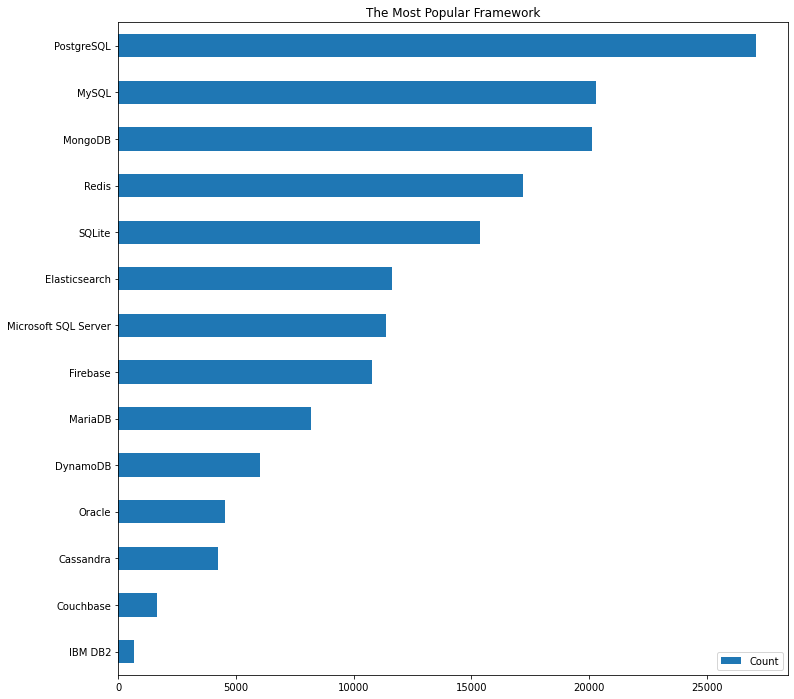

In [ ]:
framework_count = pd.DataFrame.from_dict(unique_frameworks, orient='index', dtype=None)
framework_count.columns = ['Count']
framework_count.sort_values('Count',ascending=True,inplace=True)

framework_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'The Most Popular Framework');

In [ ]:
developers = survay_raw_df[survay_raw_df['DevType'].notnull()] # drop null values

unique_developers = {}

# split the developer on ;
for developer_set in developers['DevType'].apply(lambda row: str(row).split(';')):
    for developer in developer_set:
        if developer not in unique_developers.keys():
            unique_developers[developer] = 1
        else:
            unique_developers[developer] += 1

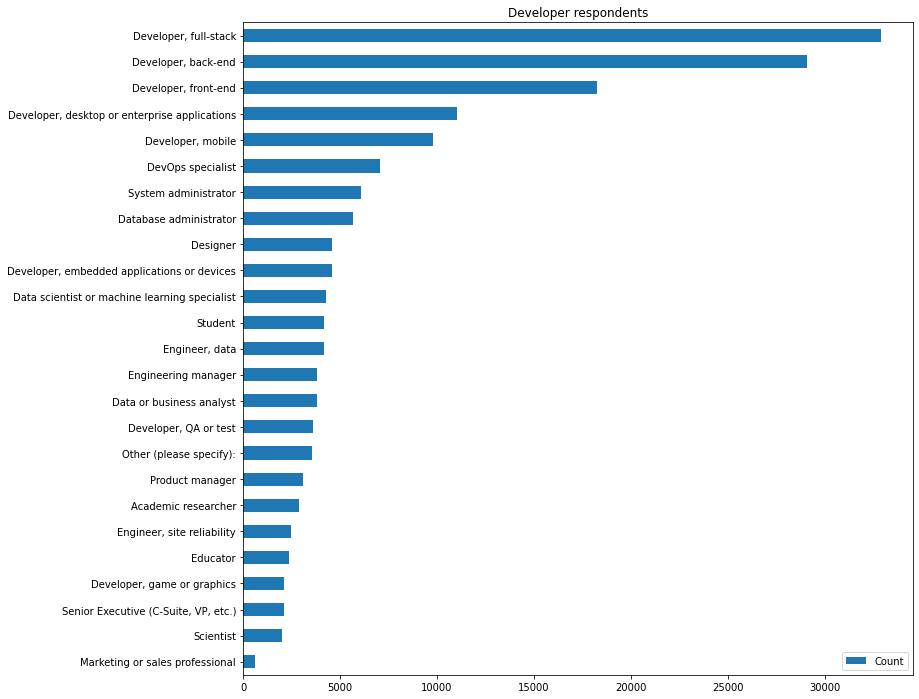

In [ ]:
developer_count = pd.DataFrame.from_dict(unique_developers, orient='index', dtype=None)
developer_count.columns = ['Count']
developer_count.sort_values('Count',ascending=True,inplace=True)

developer_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Developer respondents');

In [ ]:
# now for each 'Data scientist or machine learning specialist' developer, lets get framework counts
frameworks = frameworks[(frameworks['DevType'].notnull())&(frameworks['ToolsTechHaveWorkedWith'].notnull())&(frameworks['ToolsTechHaveWorkedWith']!='')]

# lets create an empty developer dict
developer_dict = {}
for devtype in developer_count.index.tolist():
    developer_dict['{}'.format(devtype)] = {}

# populate the dictionary with frameworks
for dev in developer_dict.keys():
    developer_dict[dev] = {key: 0 for key in list(unique_frameworks.keys())}
    
# now lets count the number of developers using the framework
for key, val in enumerate(frameworks['DevType']):
    all_developers = val.split(';')
    all_frameworks = frameworks.iloc[key]['ToolsTechHaveWorkedWith'].split(';')
    for dev in all_developers:
        for fra in all_frameworks:
            developer_dict[dev][fra] += 1

developer_framework_count = pd.DataFrame.from_dict(developer_dict, orient='index', dtype=None).T

ds_count = pd.DataFrame(developer_framework_count['Data scientist or machine learning specialist'])
ds_count.columns = ['Count']
ds_count.sort_values('Count',ascending=True,inplace=True)

ds_count.plot(kind = 'barh', figsize = (12,12), fontsize = 10, title = 'Total Count');

KeyError: ignored

In [ ]:
key

0

In [ ]:
frameworks[]

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
0,1,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovakia,,,"Secondary school (e.g. American high school, G...",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,62268.0
93,94,I am a developer by profession,Employed full-time,India,,,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",25 - 34 years,Online Courses or Certification,6,...,25-34 years old,Man,No,Straight / Heterosexual,East Asian,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,
118,119,I am a developer by profession,Employed full-time,United States of America,Iowa,,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,Friend or family member,12,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,140000.0
137,138,I am a developer by profession,Employed full-time,Canada,,,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",35 - 44 years,"Other online resources (ex: videos, blogs, etc...",,...,35-44 years old,Man,No,Straight / Heterosexual,South Asian,None of the above,None of the above,Appropriate in length,Easy,63530.0
166,167,I am a developer by profession,Employed full-time,Croatia,,,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Coding Bootcamp;School,8,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,17412.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83320,83321,I am a developer by profession,Employed full-time,United States of America,California,,,11 - 17 years,School,16,...,,,,,,,,,,111000.0
83381,83382,I am a developer by profession,Employed full-time,Chile,,,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Colleague,8,...,25-34 years old,Man,No,Straight / Heterosexual,Hispanic or Latino/a/x,None of the above,None of the above,Too long,Easy,30108.0
83393,83394,I am a developer by profession,Employed full-time,Oman,,,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Coding Bootcamp;Other online resources (ex: vi...,4,...,25-34 years old,Man,No,,Black or of African descent,,,Too long,Easy,
83396,83397,I am a developer by profession,Employed full-time,United States of America,Idaho,,"Secondary school (e.g. American high school, G...",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",20,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,,,Too long,Neither easy nor difficult,
